In [ ]:
#
# hw5pr1births_modeler:  birth classification model-building 
#
# the relationship:  using features month + day, how well can we predict "birth-popularity" 
#
#     to keep this as _classification_, we will use the binary above/below median as the target (the median is 190942)
#

### <font color="DodgerBlue">hw5pr1 births modeler</font>

Suggestion:
+ set up this file and the example iris_modeler file side-by-side...
+ for each iris_modeler cell, copy it over..
   + edit it and make adjustments to suit the births problem (as needed)
   + run it to make sure it all works!

And, by the end, you'll have experienced the full ML/data modeling workflow (for classification, at least)
+ Running through this workflow by hand is a great way to digest the process...
+ hw5pr2 will ask you to do this again, with the digits
+ hw5ec is for another - optional - example, using your own dataset or, possibly, regression 



### <font color="Coral">Final, _big-picture_ question</font>   
+ Which phenomenon, iris-species or birthday-popularity, is more "modelable"?
+ ... at least, as far as these two datasets are concerned?!

Note that you might want to wait until _after_ modeling the births data to answer this...

<hr>

Below ... after finishing the model-building ... share your thoughts on which (irises/births) is more "modelable" and why ...

<br><br>

## Modeling birthdays

Remember: Be sure to **drop** the column with the official birth numbers.

The goal is to model whether a birthday is above-average or below-average in popularity, based on two features: <tt>month</tt> and <tt>day</tt>

In [ ]:
#
# SUGGESTION:  
# 
#       +++ copy-paste-and-alter from the iris-modeling notebook to here +++
#
# This approach has the advantage of more deeply "digesting" the iris workflow...
#      ...altering the parts that don't transfer, and taking the parts that do
#

#
# WARNING:    Be _sure_ to remove the "births" column.    (It allows the modeling to "cheat"...)
#           

In [ ]:
# You'll insert (or copy-paste-edit) lots of cells!

In [1]:
#
# hw5pr1iris_modeler:  iris clasification via nearest neighbors
#

# We will be using the sklearn library - let's check if we have it:
import sklearn

In [2]:

!pip3 install -U scikit-learn

In [3]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [4]:
cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_tidy

births_cleaned.csv : file read into a pandas dataframe.


,month,day,above/below median,a/b num
0,1,1,below,0
1,1,2,below,0
2,1,3,below,0
3,1,4,below,0
4,1,5,below,0
...,...,...,...,...
367,12,27,above,1
368,12,28,above,1
369,12,29,above,1
370,12,30,above,1


In [5]:
#
# it's no fun fiddling with the default table formatting.
#
# Remember: we have the data itself!  If we want to see it, we can print:

(NROWS, NCOLS) = df_tidy.shape
print(f"There are {NROWS = } and {NCOLS = }")
print()

for row in range(0,NROWS,5):
    print(df_tidy[row:row+5])    # Let's print 5 at a time...

There are NROWS = 366 and NCOLS = 4

   month  day above/below median  a/b num
0      1    1              below        0
1      1    2              below        0
2      1    3              below        0
3      1    4              below        0
4      1    5              below        0
   month  day above/below median  a/b num
5      1    6              below        0
6      1    7              below        0
7      1    8              below        0
8      1    9              below        0
9      1   10              below        0
    month  day above/below median  a/b num
10      1   11              below        0
11      1   12              below        0
12      1   13              below        0
13      1   14              above        1
14      1   15              below        0
    month  day above/below median  a/b num
15      1   16              below        0
16      1   17              below        0
17      1   18              below        0
18      1   19              b

In [6]:
#
# Let's drop the columns [features] we don't want/need 
#                or that we _shouldn't_ have...!
#

# First, look at the info:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 371
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               366 non-null    int64 
 1   day                 366 non-null    int64 
 2   above/below median  366 non-null    object
 3   a/b num             366 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.3+ KB


### Drop columns we don't want (or shouldn't use)
+ Here, we don't need `above/below median` , because we have `a/b num` and `sklearn` needs only numeric features
+ <font color="Coral"><b>and</b></font>, for the births dataset, you'll need to drop the raw birth numbers 
   + leaving the raw birth numbers would be "cheating" for the classification
   + if you get over 95% of the births correct, go back and drop the raw birth numbers!

In [11]:
#
# All of the columns need to be numeric, so we'll drop irisname, which holds strings
#
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('above/below median', axis=COLUMN )
df_model1

,month,day,a/b num
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
...,...,...,...
367,12,27,1
368,12,28,1
369,12,29,1
370,12,30,1


### Create variables for columns and species 
+ we may not need these, but it's good to know we have them
+ the <tt>COLUMNS</tt> are the features and target 
+ and the <tt>SPECIES</tt> map the strings and numbers that describe the different target values (species)
+ you might remember that the "cleaning" file had this same cell... it's copied from there:

<br><br>
<hr>
<br><br>

In [12]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place 
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

AMOUNT = ['below','above']   # int to str
AMOUNT_INDEX = {'below':0,'above':1}  # str to int

# Let's try it out...
for name in AMOUNT:
    print(f"{name} maps to {AMOUNT_INDEX[name]}")

COLUMNS is Index(['month', 'day', 'a/b num'], dtype='object')

COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'a/b num': 2}


below maps to 0
above maps to 1


### We could reweight our columns

It's nice to have numpy arrays to do this..

In [14]:
#
# We _could_ reweight our columns...
# What if petalwid is "worth" 20x more than the others?
# 
# df_model1pt5['a/b num'] *= 10
# df_model1pt5
df_model1

,month,day,a/b num
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
...,...,...,...
367,12,27,1
368,12,28,1
369,12,29,1
370,12,30,1


### We convert from pandas (a spreadsheet) to numpy (an array)

All of the modeling happens on arrays of data (numpy arrays)

In [15]:
A = df_model1.to_numpy()    # yields the underlying numpy array
print(A)

[[ 1  1  0]
 [ 1  2  0]
 [ 1  3  0]
 ...
 [12 29  1]
 [12 30  1]
 [12 31  1]]


In [16]:

#
# let's make sure it's all floating-point, so we can multiply and divide
#
#       this is not needed here, but it can be important if some features are integer and floating point is needed


A = A.astype('float64')  # so many numpy types!   Here is a list:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[ 1.  1.  0.]
 [ 1.  2.  0.]
 [ 1.  3.  0.]
 ...
 [12. 29.  1.]
 [12. 30.  1.]
 [12. 31.  1.]]


In [17]:
#
# Also, nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")



The dataset has 366 rows and 3 cols


In [18]:
# let's use all of our variables, to reinforce that we have everything:
# (1) names...
# (2) access and control...
# choose a row index, n:

n = 137     # the row number

# This shows us that we have complete access to any individual data "point" (row)
print(f"The number of births on #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {round(value,2)}")

ab_index = COL_INDEX['a/b num']
ab_num = int(round(A[n][ab_index]))
ab = AMOUNT[ab_num]
print(f"  The birth amount is {ab} (i.e., {ab_num})")

The number of births on #137 is [ 5. 17.  0.]
  Its month is 5.0
  Its day is 17.0
  Its a/b num is 0.0
  The birth amount is below (i.e., 0)


### We define our **features** (<tt>X_all</tt>) and our **target** (<tt>y_all</tt>)

Notice that we can define _any_ column be the target (the predicted value, y_all) 
+ whether it makes _sense_ to do so is another question,
+ which is up to us...

In [19]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

#
# Watch out!  Between datasets, this cell is one that often needs to be carefully changed...
#

X_all = A[:,0:2]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,2]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/(above/below))   are all here: \n {y_all}")
print()
print(f"X_all (just the features, 5 rows worth) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/(above/below))   are all here: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.

### We permute the data to avoid dependence on its order...

In [20]:
#
# we scramble the data, to remove (potential) dependence on the data ordering:
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_labeled}")
print()
print(f"The corresponding data rows are \n {X_labeled}")


The scrambled labels/species are 
 [1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 

### Next, we split into training and testing data portions of the dataset

Usually,
+ 80% training data (X_train, with y_train known)
+ 20% testing data (X_test, with y_test known)

In [21]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data at all when building the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    To do so, let's define TEST_PERCENT as 0.2
#

TEST_PERCENT = 0.2

from sklearn.model_selection import train_test_split      # this function splits into training + testing sets

# Here we create four numpy arrays:
#    X_train are a 2d array of features and observations for training
#    y_train are a single-column of the correct species for X_train (that's how it trains!)
#
#    X_test are a 2d array of features and observations for testing (unseen during training)
#    y_test are a single-column of the correct species for X_test (so we can measure how well the testing goes...) 

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=TEST_PERCENT)  # random_state=42

# Done!  Let's confirm these match our intution:

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)} rows)")
print(f"y_test: {y_test}")
print(f"X_test (first few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)} rows)")
print(f"y_train: {y_train}")
print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

training with 292 rows;  testing with 74 rows

Held-out data... (testing data: 74 rows)
y_test: [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0.]
X_test (first few rows): [[ 6.  5.]
 [ 3. 15.]
 [ 6. 18.]
 [ 5. 27.]
 [10. 29.]]

Data used for modeling... (training data: 292 rows)
y_train: [1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 1

<br>

#### Here is where the model-buidling begins in earnest...

In [22]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a kNN model and train it! 
#
from sklearn.neighbors import KNeighborsClassifier

k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)

knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model ... it's one line!
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)  

Created and trained a knn classifier with k = 84


<br>

# That's it! :-)

In fact, the model is complete!  Let's test...   


<font size="-2">Then, let's build a <i>better</i> model.</font>

In [23]:
#
# +++ This cell is our "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 0.]
Actual  labels  : [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0.]

Results on test set:  58 correct out of 74 total.


### Let's format things more carefully...

In [24]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')   
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {AMOUNT[p]:>12s} {AMOUNT[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :        above below          incorrect
row   1 :        below below          
row   2 :        above above          
row   3 :        below below          
row   4 :        above above          
row   5 :        below above          incorrect
row   6 :        below below          
row   7 :        above below          incorrect
row   8 :        below below          
row   9 :        below below          
row  10 :        above above          
row  11 :        below below          
row  12 :        below below          
row  13 :        below below          
row  14 :        above above          
row  15 :        above above          
row  16 :        below below          
row  17 :        above above          
row  18 :        below below          
row  19 :        below below          
row  20 :        below below          
row  21 :        above below          incorrect
row  22 :        below below          
row  23 :        belo

58

## Is that it?!!

So, it may not be great. 

Even so, let's use the predictive model to make predictions and try it out!

In [25]:
#
# Ok!  We have our knn model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_amount_list = knn_model.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_amount_list[0]))  # unpack the one element it contains
    name = AMOUNT[predicted_species]                          # look up the species
    return name        
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [12,5,189.387],
                   [1,15,189.346],
                   [6,4,189.779],
                   [4,23,185.749],
                   [5,9,184.354],
                   [9,27,207.606],        # -4.7? .01?  0?
                   ]
ListofFeatures = [ [12,5],
                   [1,15],
                   [6,4],
                   [4,23],
                   [5,9],
                   [9,27],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    result = predictive_model( Features )
    print(f"From the Features {Features}, I predict {result}")

From the Features [12, 5], I predict above
From the Features [1, 15], I predict below
From the Features [6, 4], I predict below
From the Features [4, 23], I predict below
From the Features [5, 9], I predict below
From the Features [9, 27], I predict above


### Cross-validation

This splits up **only** the training data, X_train (with known y_train) into
+ a deeper 80/20 split, of the training data 
   + into "temporary train/test" portions
   + (this is 64/16, relative to the overall dataset)
+ and does this, randomly, five times...
+ measures how accurately it predicts on the "temporary test" set each time
+ averages those five and reports the results:

In [26]:
#
# Here, we use "cross validation" to find the "best" k...
#

import time
from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
all_accuracies = []
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...

# Note that we are cross-validating using only our TEST data!
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function 
    print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")

    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k

    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!

    
# use best_k!
print(f"best_k = {best_k}   yields the highest average cv accuracy: {best_accuracy}")  # print the best one


k:  1  cv accuracy:  0.7670
k:  2  cv accuracy:  0.7774
k:  3  cv accuracy:  0.7943
k:  4  cv accuracy:  0.8151
k:  5  cv accuracy:  0.8151
k:  6  cv accuracy:  0.8151
k:  7  cv accuracy:  0.8185
k:  8  cv accuracy:  0.8252
k:  9  cv accuracy:  0.8115
k: 10  cv accuracy:  0.8217
k: 11  cv accuracy:  0.8015
k: 12  cv accuracy:  0.8014
k: 13  cv accuracy:  0.7911
k: 14  cv accuracy:  0.8116
k: 15  cv accuracy:  0.7808
k: 16  cv accuracy:  0.7842
k: 17  cv accuracy:  0.7841
k: 18  cv accuracy:  0.7841
k: 19  cv accuracy:  0.7808
k: 20  cv accuracy:  0.7876
k: 21  cv accuracy:  0.7774
k: 22  cv accuracy:  0.7877
k: 23  cv accuracy:  0.7877
k: 24  cv accuracy:  0.7774
k: 25  cv accuracy:  0.7705
k: 26  cv accuracy:  0.7705
k: 27  cv accuracy:  0.7705
k: 28  cv accuracy:  0.7705
k: 29  cv accuracy:  0.7809
k: 30  cv accuracy:  0.7739
k: 31  cv accuracy:  0.7741
k: 32  cv accuracy:  0.7774
k: 33  cv accuracy:  0.7706
k: 34  cv accuracy:  0.7672
k: 35  cv accuracy:  0.7741
k: 36  cv accuracy: 

### This feels like an excuse to use seaborn...

<Axes: xlabel='k_value', ylabel='accuracy'>

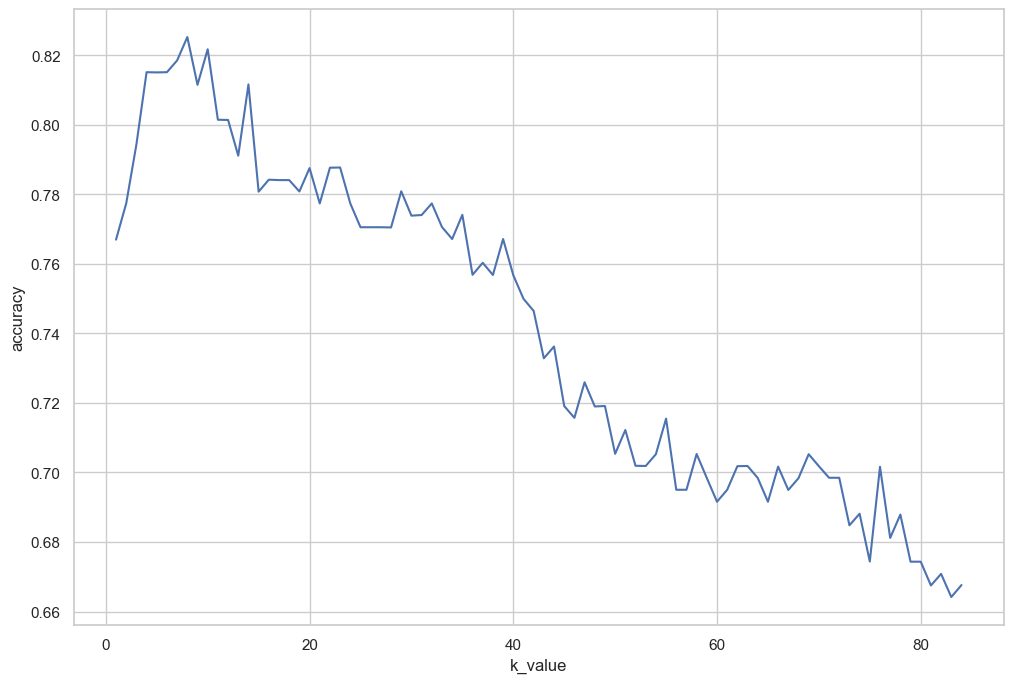

In [27]:
### Let's see all the accuracies!

import pandas as pd

# Let's create a new pandas dataframe using the data from the above cell
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="whitegrid", rc = {'figure.figsize':(12,8)})  # other options: darkgrid, whitegrid, dark, white, ticks
sns.lineplot(x="k_value", y="accuracy", data=crossvalidation_df)

### Let's use the "correct value" of k

It will not always be the same, because cross-validation is randomized...

In [28]:
#
# With the best k, we build and train a new model:
#
# Now using best_k instead of the original, randomly-guessed value:   
#
best_k = best_k   # not needed, but nice to remind ourselves of the variable name
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k!

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")  

# How does it do?!  The next cell will show...

Created + trained a knn classifier, now tuned with a (best) k of 8


### We've made a (better!) model

Let's see how it does...

In [29]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

# And, the overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.\n\n")

# Plus, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0.]
Actual labels: [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0.]

Results on test set:  64 correct out of 74 total.



row   # :    predicted actual         result
row   0 :        below below          
row   1 :        below below          
row   2 :        above above          
row   3 :        below below          
row   4 :        below above          incorrect
row   5 :        below above          incorrect
row   6 :        below below          
row   7 :        below below          
row   8 :        below below          
row   9 :        below below          
row  1

64

### To make a FINAL predictive model, we use <b>all</b> the data -- with the <u>tuned</u> parameter <tt>k</tt>

That is, we 
+ use the best value of <tt>k</tt>, as computed above by cross-validation
+ then, we train on _all_ of the data!

Notice that this next cell uses X_all and y_all:

In [30]:
#
# Ok!  We tuned our knn modeling to use the "best" value of k...
#
# And, we should now use ALL available data to train our final predictive model:
#
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)     # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # KEY DIFFERENCE:  we use ALL the data!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}") 

Created + trained a 'final' knn classifier, with a (best) k of 8


In [31]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features, Model ):                 # to allow the input of any Model
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed for 2d
    predicted_amount = Model.predict(our_features)       # The model's prediction!
    predicted_amount = int(round(predicted_amount[0]))  # unpack the extra brackets
    return predicted_amount
   
#
# Try it!
# 

LoF = [
[6, 22],   # actually above
[8, 15 ],   # actually above
[2, 7 ],   # actually below
[1, 19 ],   # actually below
[12, 7],   # actually below
[4, 17],   # actually below
[7, 4],   # actually below
[12, 8 ],   # actually above
[5, 3],   # actually below,

[0,0],
[2, 30],   # let's use this for our own "new" iris ...
]

# run on each one:
for Features in LoF:
    predicted_amount = predictive_model( Features, knn_model_final )  # pass in the model, too!
    name = AMOUNT[predicted_amount]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict below from the features [6, 22]
I predict above from the features [8, 15]
I predict below from the features [2, 7]
I predict below from the features [1, 19]
I predict below from the features [12, 7]
I predict below from the features [4, 17]
I predict above from the features [7, 4]
I predict above from the features [12, 8]
I predict below from the features [5, 3]
I predict below from the features [0, 0]
I predict below from the features [2, 30]


In [32]:
print(X_train[0:5])

[[11.  7.]
 [11. 11.]
 [ 2. 18.]
 [ 5. 11.]
 [ 9. 30.]]


### Predictive models aren't perfect!
+ Notice that the last prediction above the [0,0,0,0] is (probably) wrong
  + It probably predicted _versicolor_, but it was actually a _virginica_
  + In essence, it was a _virginica_ iris that "looked more like" a _versicolor_ ... ***from these four features!***
  + A botanist would use more than these four features to classify difference species...

+ **Key**: Even when the modeling process runs "perfectly," the models are likely to be imperfect...
+ ... it's just that we won't know where the imperfections are -- until future observations arrive!

### That's it! Our model is complete...

... not perfect, but **complete** 

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [33]:
# we can only plot 2 dimensions at a time! 
# One of the variables will be our constant:  NO CONSTANTS NEEDED!
# day = 15
# month = 
# above/below median = 

VERTICAL = np.arange(1,32,1) # array of vertical input values
HORIZONT = np.arange(1,13,1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = knn_model_final


col = 0
row = 0
for day in VERTICAL: # for every sepal length
  for month in HORIZONT: # for every sepal width
    Features = [ month, day ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the lower-left corner
print()
print("Decision boundaries complete ... all are in the variable PLANE.")

...............................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Decision boundaries complete ... all are in the variable PLANE.


Remember our numerical representation for above and below
0 - below      (midnight blue)
1 - above   (navy blue)


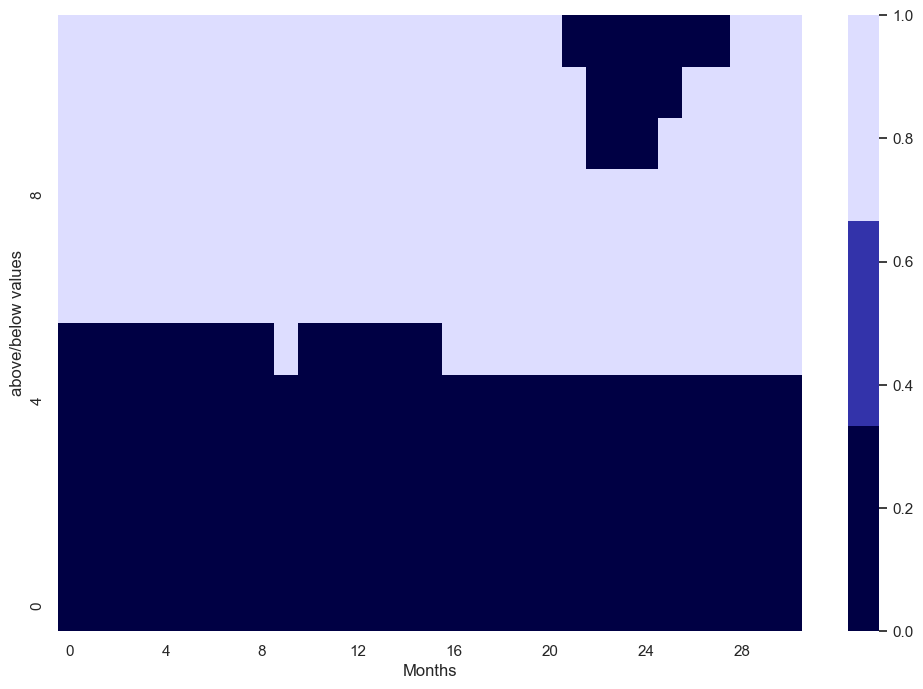

In [37]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set_theme(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE, cmap=['#000044','#3333aa','#ddddff'], vmin=0, vmax=1 )
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="Months", ylabel="above/below values")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


print("Remember our numerical representation for above and below")
print("0 - below      (midnight blue)")
print("1 - above   (navy blue)")

### Make the month dimension constant and vary the other dimensions

### We're ready to deploy our "final + best" predictive model!

### Congrats!

You've created a birthday-popularity modeler!

The rest of the hw - and the rest of our ML module - is to run more ML workflows:   
+ for different datasets:  &nbsp; (2) Digits, (ec) your own data, or Titanic, or Housing, or ...
+ and, starting next time, for different algorithms: &nbsp; decision trees and random forests, then nnets, ...

### Remember to answer the "which dataset is more modelable?" question: _births_ or _irises_ ?  

It's here: Irises is more modelable

<br>

### <font color="Coral">Final, _big-picture_ question</font>  
+ Which phenomenon, iris-species or birthday-popularity, is more "modelable"?
+ ... at least, as far as these two datasets are concerned?!

Note that you might want to wait until _after_ modeling the births data to answer this...

<hr>



Here, share your thoughts on which (irises/births) is more "modelable" and why:

<br><br>
<br><br>